In [1]:
# import statements
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('olympics_dataset.csv', index_col=0)
print(df.shape)
df.head()

(252565, 10)


,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal
player_id,,,,,,,,,,
0,A Dijiang,M,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,A Lamusi,M,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No medal
2,Gunnar Aaby,M,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,No medal
3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,Cornelia (-strannood),F,Netherlands,NED,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No medal


In [3]:
# lets look at the data before any cleaning or changes

In [4]:
df.nunique().to_frame(name="Unique value count")

,Unique value count
Name,129992
Sex,2
Team,1193
NOC,234
Year,31
Season,1
City,23
Sport,76
Event,1041
Medal,4


In [5]:
df.apply(pd.unique).to_frame(name="Unique values")

,Unique values
Name,"[A Dijiang, A Lamusi, Gunnar Aaby, Edgar Aabye..."
Sex,"[M, F]"
Team,"[China, Denmark, Denmark/Sweden, Netherlands, ..."
NOC,"[CHN, DEN, NED, FIN, NOR, ROU, EST, FRA, MAR, ..."
Year,"[1992, 2012, 1920, 1900, 1932, 1952, 2000, 199..."
Season,[Summer]
City,"[Barcelona, London, Antwerpen, Paris, Los Ange..."
Sport,"[Basketball, Judo, Football, Tug-Of-War, Athle..."
Event,"[Basketball Men's Basketball, Judo Men's Extra..."
Medal,"[No medal, Gold, Bronze, Silver]"


In [6]:
# data cleaning

In [7]:
# for all object types, which are strings, we will strip blank characters from start and end of value if any
df = df.apply(lambda x: x.str.strip() if x.dtype=="object" else x)

In [8]:
# checking for null values
df.isna().sum()

Name      0
Sex       0
Team      0
NOC       0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

In [9]:
# checking for duplicate values
print(df.duplicated().sum())
df[df.duplicated(keep=False)]

1466


,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal
player_id,,,,,,,,,,
542,Haidar Hassan,M,Iraq,IRQ,2004,Summer,Athina,Football,Football Men's Football,No medal
543,Haidar Hassan,M,Iraq,IRQ,2004,Summer,Athina,Football,Football Men's Football,No medal
1251,Dsir Acket,M,Belgium,BEL,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",No medal
1252,Dsir Acket,M,Belgium,BEL,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",No medal
2500,Muhammad Ahmed,M,Pakistan,PAK,2000,Summer,Sydney,Hockey,Hockey Men's Hockey,No medal
...,...,...,...,...,...,...,...,...,...,...
270200,Henri Zo,M,France,FRA,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",No medal
318,Mohamed Ali,M,Bahrain,BRN,2020,Summer,Tokyo,Handball,Men Team,No medal
319,Mohamed Ali,M,Bahrain,BRN,2020,Summer,Tokyo,Handball,Men Team,No medal


In [10]:
# removing duplicate values
df = df.drop_duplicates()
df.shape

(251099, 10)

In [11]:
# dropping column Season as there is only one
df = df.drop(columns=['Season'])
df.head()

,Name,Sex,Team,NOC,Year,City,Sport,Event,Medal
player_id,,,,,,,,,
0,A Dijiang,M,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,A Lamusi,M,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,No medal
2,Gunnar Aaby,M,Denmark,DEN,1920,Antwerpen,Football,Football Men's Football,No medal
3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,Cornelia (-strannood),F,Netherlands,NED,1932,Los Angeles,Athletics,Athletics Women's 100 metres,No medal


In [12]:
# lets rename the columns for better development
column_mapping = {
    'Name': 'name',
    'Sex': 'gender',
    'Team': 'team',
    'NOC': 'noc',
    'Year': 'year',
    'City': 'hosting_nation',
    'Sport': 'sport',
    'Event': 'event',
    'Medal': 'medal'
}

df = df.rename(columns=column_mapping)
df.head()

,name,gender,team,noc,year,hosting_nation,sport,event,medal
player_id,,,,,,,,,
0,A Dijiang,M,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,A Lamusi,M,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,No medal
2,Gunnar Aaby,M,Denmark,DEN,1920,Antwerpen,Football,Football Men's Football,No medal
3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,Cornelia (-strannood),F,Netherlands,NED,1932,Los Angeles,Athletics,Athletics Women's 100 metres,No medal


In [13]:
# to avoid misleading data, we will consider one player per group for group events
column_to_consider = [col for col in list(df.columns) if col not in ['name', 'gender']]
df = df.drop_duplicates(subset=column_to_consider)

In [14]:
# time for visualizations and insights

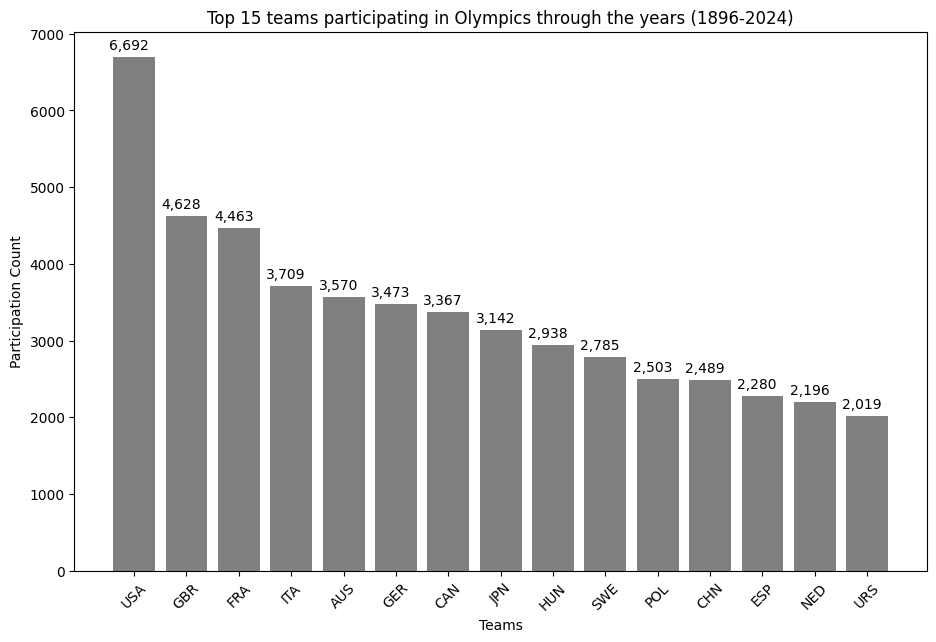

In [15]:
# looking at top 15 countries participating throughout the years
top_teams_participating = df.groupby(by='noc').size().sort_values(ascending=False).reset_index().head(15)
top_teams_participating.columns = ['noc', 'count']
figure, ax = plt.subplots(figsize=(11, 7))
bars = plt.bar(x=top_teams_participating['noc'], height=top_teams_participating['count'], color='grey')
padding=100
for bar in bars:
    val = bar.get_height()
    plt.text(x=bar.get_x()+bar.get_width()/2-0.1, y=val+padding, s=f"{int(val):,}", ha='center')
plt.xlabel('Teams')
plt.ylabel('Participation Count')
plt.title('Top 15 teams participating in Olympics through the years (1896-2024)')
plt.xticks(rotation=45)
plt.show()

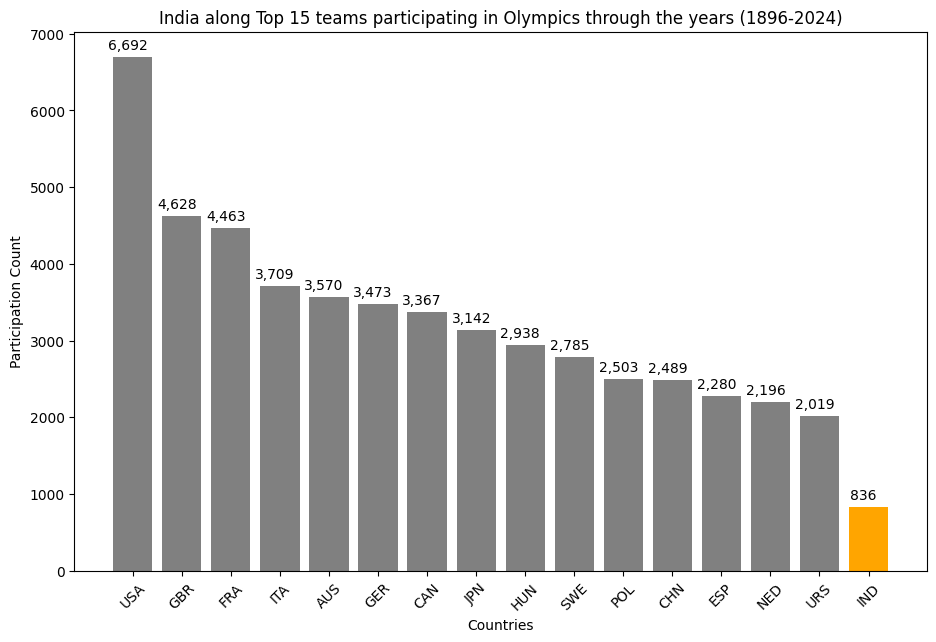

In [16]:
# Where does India Stand in this?
top_teams_participating = df.groupby(by='noc').size().sort_values(ascending=False).reset_index().head(15)
top_teams_participating.columns = ['noc', 'count']
india_record = df[df['noc'] == 'IND'].groupby(by=['noc']).size().reset_index()
india_record_dict = {'noc': india_record.iloc[0, 0], 'count': int(india_record.iloc[0, 1])}
top_teams_participating.loc[len(top_teams_participating)]  = india_record_dict
# print(top_teams_participating)
figure, ax = plt.subplots(figsize=(11, 7))
# highlighting India in plot 
highlight_index = top_teams_participating[top_teams_participating['noc'] == 'IND'].index[0]
colors = ['grey' if i!=highlight_index else 'orange' for i in range(len(top_teams_participating))]
bars = plt.bar(x=top_teams_participating['noc'], height=top_teams_participating['count'], color=colors)
padding=100
for bar in bars:
    val = bar.get_height()
    plt.text(x=bar.get_x()+bar.get_width()/2-0.1, y=val+padding, s=f"{int(val):,}", ha='center')
plt.xlabel('Countries')
plt.ylabel('Participation Count')
plt.title('India along Top 15 teams participating in Olympics through the years (1896-2024)')
plt.xticks(rotation=45)
plt.show()

We can observe that **India has significantly low participation in the Olympics overall**.
One of the few reasons could be:
1. Colonial Legacy and Lack of Infrastructure until 1947
2. Lack of Government Support and Investment
3. Poverty and Prioritization of Basic Needs
4. Cultural Focus on Cricket

On a brighter side, **India was the first Asian Nation** to take part in Olympics in 1900

In recent years we have seen a rise overall participation with improved situation and public interests

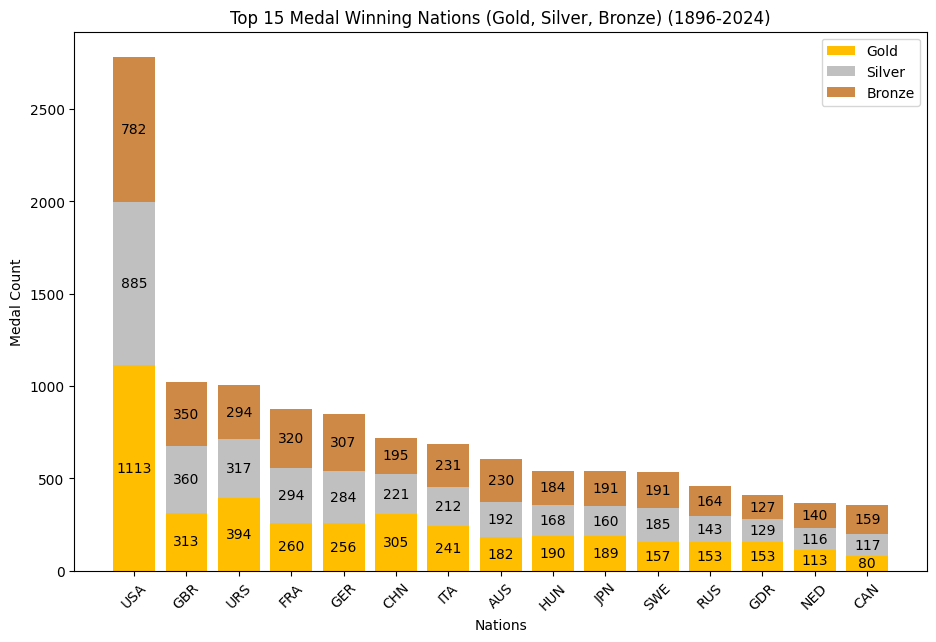

In [188]:
medal_df = df[df['medal'] != 'No medal']
medal_count = medal_df.groupby(by=['noc', 'medal']).size().unstack(fill_value=0)

top_15_countries = medal_count.sum(axis=1).sort_values(ascending=False).head(15).index
top_15_medal_count = medal_count.loc[top_15_countries]
top_15_medal_count

figure, ax = plt.subplots(figsize=(11, 7))

gold_bars = plt.bar(x=top_15_medal_count.index, height=top_15_medal_count['Gold'], color='#ffbf00', label='Gold')
silver_bars = plt.bar(x=top_15_medal_count.index, height=top_15_medal_count['Silver'], bottom=top_15_medal_count['Gold'], color='silver', label='Silver')
bronze_bars = plt.bar(x=top_15_medal_count.index, height=top_15_medal_count['Bronze'], bottom=top_15_medal_count['Gold']+top_15_medal_count['Silver'], color='#ce8946', label='Bronze')

for i in range(len(top_15_medal_count)):
    gold_height = top_15_medal_count['Gold'].iloc[i]
    silver_height = top_15_medal_count['Silver'].iloc[i]
    bronze_height = top_15_medal_count['Bronze'].iloc[i]

    plt.text(x=i, y=gold_height/2, s=gold_height, ha='center', va='center', color='black')
    plt.text(x=i, y=gold_height+silver_height/2, s=silver_height, ha='center', va='center', color='black')
    plt.text(x=i, y=gold_height+silver_height+bronze_height/2, s=bronze_height, ha='center', va='center', color='black')

plt.xlabel("Nations")
plt.ylabel("Medal Count")
plt.title("Top 15 Medal Winning Nations (Gold, Silver, Bronze) (1896-2024)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [19]:
# We can observe that even though china is 13th most participating nation, it has 8th most number of medals.
# so a fair way of finding the best performing team, we need a better way of comparing the nations, we will come to that soon

In [20]:
# Changes in sports overtime
sports_by_years = df.groupby(by=['year', 'sport']).size().unstack(fill_value=0)
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(sports_by_years)
print(sports_by_years)

sport  3x3 Basketball  3x3 Basketball, Basketball  Aeronautics  Alpinism  \
year                                                                       
1896                0                           0            0         0   
1900                0                           0            0         0   
1904                0                           0            0         0   
1906                0                           0            0         0   
1908                0                           0            0         0   
1912                0                           0            0         0   
1920                0                           0            0         0   
1924                0                           0            0         0   
1928                0                           0            0         0   
1932                0                           0            0         1   
1936                0                           0            1         1   
1948        

We can observe some interesting things:
1. Atheletics, Cycling, Fencing, Shooting, Swimming, Tennis, Weightlifting and Wrestling **kicked off the first Olympics 1896.**
2. Some games which took off decent but ***were discontinued:*** Art Competitions, Figure Skating, Motorboating, Polo (Water Polo is played), Rugby (Rugby 7s is played) and few more
3. Games which **entered the olympics almost one century after olympics began** but are now one of the most watched: Triathlon, Taekwondo, Table Tennis, Badminton, Beach Volleyball, Gymnastics
4. Athletics, Swimming, Wrestling, Weightlifting, Cycling, Shooting, Sailing, Gymnastics, Basketball, Boxing and others are one of the **most popular sports in the Olympics** till date

In [21]:
df.head()

,name,gender,team,noc,year,hosting_nation,sport,event,medal
player_id,,,,,,,,,
0,A Dijiang,M,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,A Lamusi,M,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,No medal
2,Gunnar Aaby,M,Denmark,DEN,1920,Antwerpen,Football,Football Men's Football,No medal
3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,Cornelia (-strannood),F,Netherlands,NED,1932,Los Angeles,Athletics,Athletics Women's 100 metres,No medal


In [22]:
# Let's explore India's first medal winners in each sport.
india_data = df[df['noc'] == 'IND']
medal_data = india_data[india_data['medal'] != 'No medal']
first_medal_winners = medal_data.groupby(by=['event']).first().sort_values(by='year').reset_index()
first_medal_winners = first_medal_winners[['year', 'sport', 'event', 'medal', 'name', 'gender']]
print("First Medal Winners of India in each event")
first_medal_winners

First Medal Winners of India in each event


,year,sport,event,medal,name,gender
0,1900,Athletics,Athletics Men's 200 metres Hurdles,Silver,Norman (-trevor),M
1,1900,Athletics,Athletics Men's 200 metres,Silver,Norman (-trevor),M
2,1928,Hockey,Hockey Men's Hockey,Gold,Shaukat Ali,M
3,1952,Wrestling,"Wrestling Men's Bantamweight, Freestyle",Bronze,Khashaba Jahdav,M
4,1996,Tennis,Tennis Men's Singles,Bronze,Leander Paes,M
5,2000,Weightlifting,Weightlifting Women's Light-Heavyweight,Bronze,Karnam Malleswari,F
6,2004,Shooting,Shooting Men's Double Trap,Silver,Rajyavardhan Rathore,M
7,2008,Boxing,Boxing Men's Middleweight,Bronze,Vijender Singh,M
8,2008,Wrestling,"Wrestling Men's Welterweight, Freestyle",Bronze,Sushil Solanki,M
9,2008,Shooting,"Shooting Men's Air Rifle, 10 metres",Gold,Abhinav Bindra,M


In [24]:
# lets try to observe if teams participate more in their own country or not

In [25]:
# taking austrailia to the test, we had olympics twice in the country, once in Sydney and once in Melbourne
# participation of australia over all the hosting nations

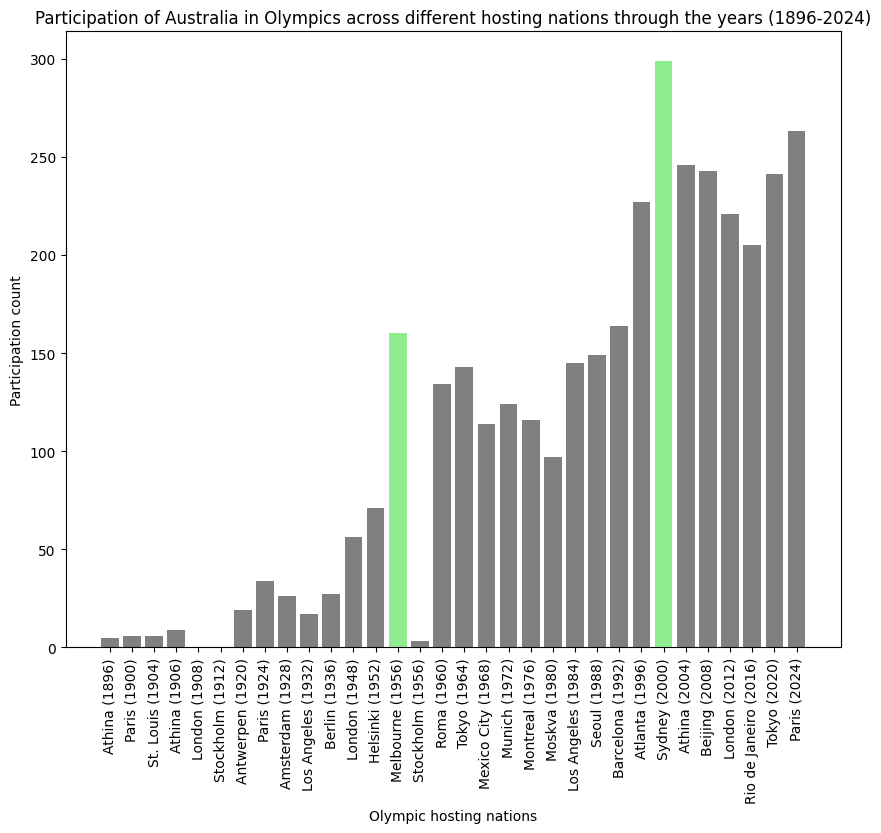

In [26]:
all_years = pd.DataFrame(df['year'].unique(), columns=['year']).sort_values(by=['year'], ascending=True).reset_index(drop=True)
all_hosting_nations = df.groupby(by=['year', 'hosting_nation']).size().reset_index()['hosting_nation']
group_df = df[df['noc'] == 'AUS']
group_host_df = group_df.groupby(by=['year', 'hosting_nation']).size().reset_index(name='participation_count')
group_host_df = pd.merge(left=all_years, right=group_host_df, on='year', how='left')
group_host_df = group_host_df.drop(columns=['hosting_nation'])
group_host_df['hosting_nation'] = all_hosting_nations

# now fill na values for counts with 0
group_host_df['participation_count'] = group_host_df['participation_count'].fillna(value=0)

# convert participation count to int
group_host_df['participation_count'] = group_host_df['participation_count'].astype(int)

# we need to add year to hosting_nation so that if a location is repeated, it wont have the total value
group_host_df['host_year'] = group_host_df['hosting_nation'] + ' (' + group_host_df['year'].astype(str) + ')'
group_host_df = group_host_df.drop(columns=['year', 'hosting_nation'])
group_host_df = group_host_df.rename(columns={0: 'participation_count'})
highlight_indices = group_host_df[group_host_df['host_year'].str.contains('Melbourne|Sydney', case=False)].index
highlight_list = list(highlight_indices)
colors = ['grey' if i not in highlight_list else 'lightgreen' for i in range(len(group_host_df))]
figure, ax = plt.subplots(figsize=(10, 8))
bars = plt.bar(x=group_host_df['host_year'], height=group_host_df['participation_count'], color=colors)
plt.title("Participation of Australia in Olympics across different hosting nations through the years (1896-2024)")
plt.xlabel("Olympic hosting nations")
plt.ylabel("Participation count")
plt.xticks(rotation=90)
plt.show()

We can clearly observe **higher participation from Australia** when Olympics were held in their **own country** (Melbourne and Sydney)

We can observe the years 1908 and 1912 where we have no participation displayed by Australia. The reasons are:
>In 1908 Olympics (London, UK), Australia competed as part of the combined team known as Australasia, which represented both Australia and New Zealand.
In 1912 Olympics (Stockholm, Sweden), Australia again competed as part of the Australasia team.

Reasons for the merger:
> Both countries were close, travel international was expensive, both part of British Empire so sense of shared identity, small athletic pool


Interestingly we can also observe that we have **2 different nations hosting olympics shown for year 1956**, Melbourne and Stockholm. The reason:
>Although Summer Olympics were held in Melbourne, **due to animal quarantine regulations in Australia, the equestrian events(horse riding and more) were held in Stockholm, Sweden.** This was an unusual arrangement, but it allowed the equestrian athletes and their horses to compete without the constraints imposed by Australia's strict animal quarantine rules.
So, the 1956 Olympics had a unique setup with the **main events in Melbourne and the equestrian events in Stockholm.**

>Australia has strict quarantine laws to protect its unique flora and fauna from diseases and pests that could be brought in from overseas. At the time, these regulations were particularly stringent regarding animals, including horses. To comply with these regulations and to avoid the potential complications of quarantining the horses for a lengthy period, the decision was made to hold the equestrian events in Stockholm, Sweden.

In [27]:
aus_data = df[df['noc'] == 'AUS']
aus_data.groupby(by=['year', 'hosting_nation'])['sport'].unique()

year  hosting_nation
1896  Athina                                          [Tennis, Athletics]
1900  Paris                                         [Swimming, Athletics]
1904  St. Louis                                     [Swimming, Athletics]
1906  Athina                                        [Athletics, Swimming]
1920  Antwerpen            [Swimming, Diving, Cycling, Athletics, Tennis]
1924  Paris             [Wrestling, Athletics, Tennis, Swimming, Cycli...
1928  Amsterdam         [Swimming, Wrestling, Athletics, Cycling, Divi...
1932  Los Angeles       [Athletics, Swimming, Cycling, Rowing, Art Com...
1936  Berlin            [Athletics, Boxing, Rowing, Swimming, Wrestlin...
1948  London            [Swimming, Wrestling, Athletics, Boxing, Cycli...
1952  Helsinki          [Swimming, Rowing, Sailing, Weightlifting, Wat...
1956  Melbourne         [Athletics, Rowing, Shooting, Football, Swimmi...
      Stockholm                                           [Equestrianism]
1960  Roma       

In [28]:
# does the higher participation contribute to winning more medals? lets find out

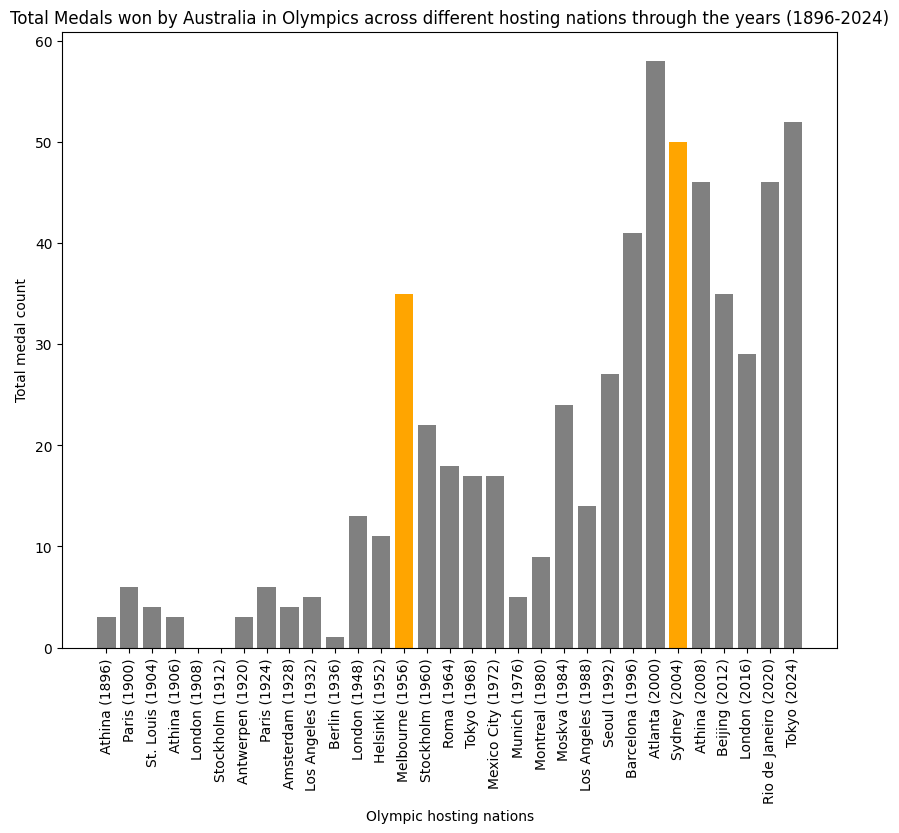

In [29]:
all_years = pd.DataFrame(df['year'].unique(), columns=['year']).sort_values(by=['year'], ascending=True).reset_index(drop=True)
all_hosting_nations = df.groupby(by=['year', 'hosting_nation']).size().reset_index()['hosting_nation']
group_df = df[df['noc'] == 'AUS']
medal_group_df = group_df[group_df['medal'] != 'No medal']
group_host_df = medal_group_df.groupby(by=['year', 'hosting_nation']).size().reset_index(name='medal_count')
group_host_df = pd.merge(left=all_years, right=group_host_df, on='year', how='left')
group_host_df = group_host_df.drop(columns=['hosting_nation'])
group_host_df['hosting_nation'] = all_hosting_nations

# now fill na values for counts with 0
group_host_df['medal_count'] = group_host_df['medal_count'].fillna(value=0)

# convert participation count to int
group_host_df['medal_count'] = group_host_df['medal_count'].astype(int)

# we need to add year to hosting_nation so that if a location is repeated, it wont have the total value
group_host_df['host_year'] = group_host_df['hosting_nation'] + ' (' + group_host_df['year'].astype(str) + ')'
group_host_df = group_host_df.drop(columns=['year', 'hosting_nation'])
group_host_df = group_host_df.rename(columns={0: 'medal_count'})
highlight_indices = group_host_df[group_host_df['host_year'].str.contains('Melbourne|Sydney', case=False)].index
highlight_list = list(highlight_indices)
colors = ['grey' if i not in highlight_list else 'orange' for i in range(len(group_host_df))]
figure, ax = plt.subplots(figsize=(10, 8))
bars = plt.bar(x=group_host_df['host_year'], height=group_host_df['medal_count'], color=colors)
plt.title("Total Medals won by Australia in Olympics across different hosting nations through the years (1896-2024)")
plt.xlabel("Olympic hosting nations")
plt.ylabel("Total medal count")
plt.xticks(rotation=90)
plt.show()

We cannot observe any extraordinary medal winning behaviour for Australia in the home ground

In [30]:
# lets do the same for one more nation: China

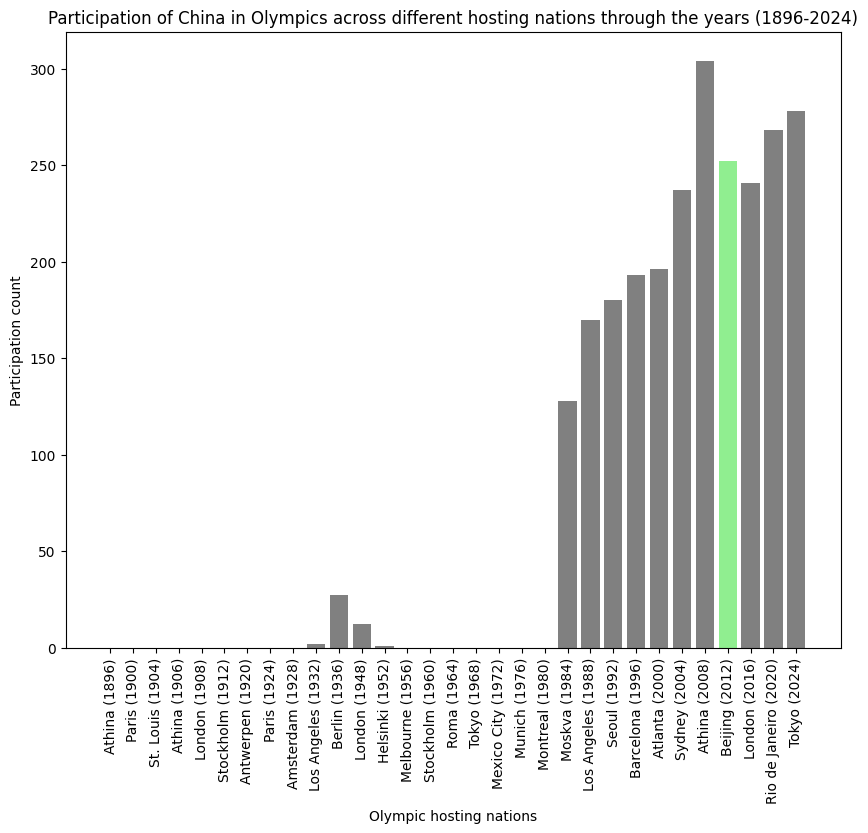

In [31]:
all_years = pd.DataFrame(df['year'].unique(), columns=['year']).sort_values(by=['year'], ascending=True).reset_index(drop=True)
all_hosting_nations = df.groupby(by=['year', 'hosting_nation']).size().reset_index()['hosting_nation']
group_df = df[df['noc'] == 'CHN']
group_host_df = group_df.groupby(by=['year', 'hosting_nation']).size().reset_index(name='participation_count')
group_host_df = pd.merge(left=all_years, right=group_host_df, on='year', how='left')
group_host_df = group_host_df.drop(columns=['hosting_nation'])
group_host_df['hosting_nation'] = all_hosting_nations

# now fill na values for counts with 0
group_host_df['participation_count'] = group_host_df['participation_count'].fillna(value=0)

# convert participation count to int
group_host_df['participation_count'] = group_host_df['participation_count'].astype(int)

# we need to add year to hosting_nation so that if a location is repeated, it wont have the total value
group_host_df['host_year'] = group_host_df['hosting_nation'] + ' (' + group_host_df['year'].astype(str) + ')'
group_host_df = group_host_df.drop(columns=['year', 'hosting_nation'])
group_host_df = group_host_df.rename(columns={0: 'participation_count'})
highlight_indices = group_host_df[group_host_df['host_year'].str.contains('Beijing', case=False)].index
highlight_list = list(highlight_indices)
colors = ['grey' if i not in highlight_list else 'lightgreen' for i in range(len(group_host_df))]
figure, ax = plt.subplots(figsize=(10, 8))
bars = plt.bar(x=group_host_df['host_year'], height=group_host_df['participation_count'], color=colors)
plt.title("Participation of China in Olympics across different hosting nations through the years (1896-2024)")
plt.xlabel("Olympic hosting nations")
plt.ylabel("Participation count")
plt.xticks(rotation=90)
plt.show()

Some key observations and possible **explanations for absense of China** in most of early Olympic games:

1. 1900–1932: Political instability, lack of infrastructure, and internal strife.
2. 1940 & 1944: Olympics canceled due to World War II.
3. 1948: Chinese Civil War prevented participation.
4. 1952–1980: Diplomatic disputes over recognition (PRC vs. ROC), PRC boycott due to Taiwan's recognition.
5. 1980: PRC joined the US-led boycott of Moscow Olympics.
6. 1984: **Full return** after IOC recognition of both PRC and Taiwan (Chinese Taipei)

We cannot observe a surge in participation with homeground(Beijing) due to it being actively involved in the Games since 1984 and having a **medal winning strategy** over more quantity (China **topped the gold medal tally** (51 in total) during Olympics in Beinjing )

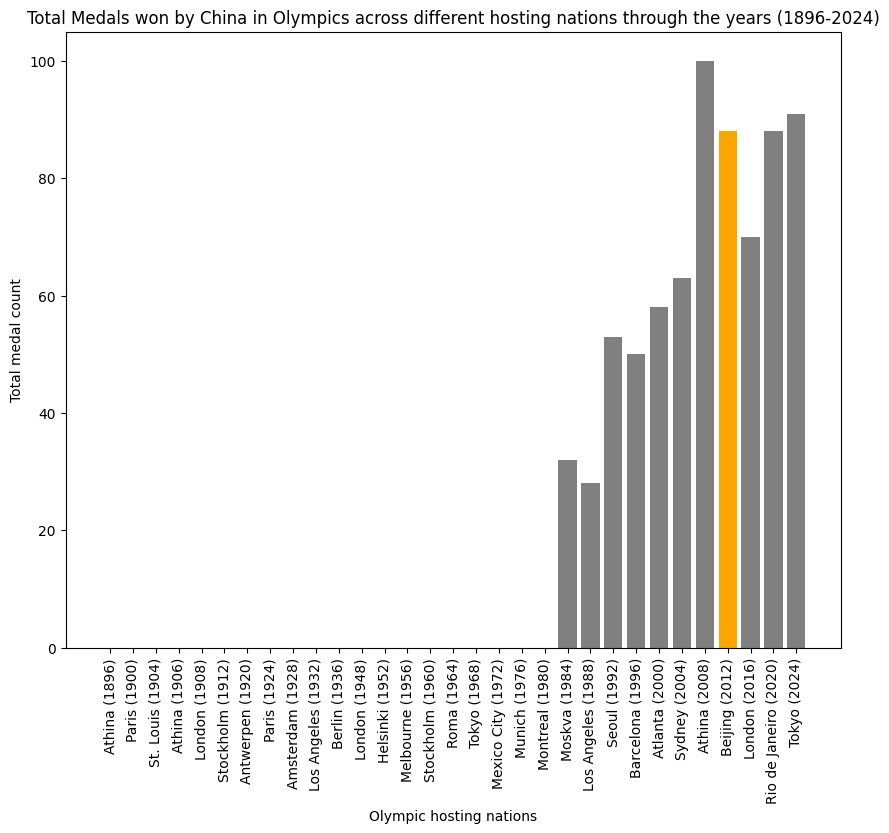

In [32]:
all_years = pd.DataFrame(df['year'].unique(), columns=['year']).sort_values(by=['year'], ascending=True).reset_index(drop=True)
all_hosting_nations = df.groupby(by=['year', 'hosting_nation']).size().reset_index()['hosting_nation']
group_df = df[df['noc'] == 'CHN']
medal_group_df = group_df[group_df['medal'] != 'No medal']
group_host_df = medal_group_df.groupby(by=['year', 'hosting_nation']).size().reset_index(name='medal_count')
group_host_df = pd.merge(left=all_years, right=group_host_df, on='year', how='left')
group_host_df = group_host_df.drop(columns=['hosting_nation'])
group_host_df['hosting_nation'] = all_hosting_nations

# now fill na values for counts with 0
group_host_df['medal_count'] = group_host_df['medal_count'].fillna(value=0)

# convert participation count to int
group_host_df['medal_count'] = group_host_df['medal_count'].astype(int)

# we need to add year to hosting_nation so that if a location is repeated, it wont have the total value
group_host_df['host_year'] = group_host_df['hosting_nation'] + ' (' + group_host_df['year'].astype(str) + ')'
group_host_df = group_host_df.drop(columns=['year', 'hosting_nation'])
group_host_df = group_host_df.rename(columns={0: 'medal_count'})
highlight_indices = group_host_df[group_host_df['host_year'].str.contains('Beijing', case=False)].index
highlight_list = list(highlight_indices)
colors = ['grey' if i not in highlight_list else 'orange' for i in range(len(group_host_df))]
figure, ax = plt.subplots(figsize=(10, 8))
bars = plt.bar(x=group_host_df['host_year'], height=group_host_df['medal_count'], color=colors)
plt.title("Total Medals won by China in Olympics across different hosting nations through the years (1896-2024)")
plt.xlabel("Olympic hosting nations")
plt.ylabel("Total medal count")
plt.xticks(rotation=90)
plt.show()

We cannot observe any extraordinary medal winning behaviour for China in the home ground (Beijing) **however it topped the gold medal tally with total of 51 golds**

**China won its first olympic medal in 1984** yet it is **6th most medal winning nation** in the world right now(as of 2024)

In [33]:
# lets look at best performers for all the olympics
# criteria: most number of total medals

In [63]:
medal_data = df[df['medal'] != 'No medal']
medal_count_data = medal_data.groupby(by=['year', 'noc']).size().reset_index(name='medal_count')
sorted_count_data = medal_count_data.sort_values(by=['year', 'medal_count'], ascending=[True, False])
most_medal_data = sorted_count_data.groupby(by=['year']).first().reset_index()
print("Most medal winning nations for each Olympics:")
print(most_medal_data)

print("\n")
print("Count of most medal winning nations:")
most_medal_data.groupby(by=['noc']).size().sort_values(ascending=False)

Most medal winning nations for each Olympics:
    year  noc  medal_count
0   1896  GRE           44
1   1900  FRA          109
2   1904  USA          231
3   1906  FRA           41
4   1908  GBR          145
5   1912  SWE           65
6   1920  USA           95
7   1924  USA           99
8   1928  USA           56
9   1932  USA          110
10  1936  GER          101
11  1948  USA           84
12  1952  USA           76
13  1956  URS           98
14  1960  URS          103
15  1964  URS           93
16  1968  USA          107
17  1972  URS           99
18  1976  URS          125
19  1980  URS          195
20  1984  USA          173
21  1988  URS          131
22  1992  EUN          112
23  1996  USA          101
24  2000  USA           91
25  2004  USA          101
26  2008  USA          110
27  2012  USA          103
28  2016  USA          121
29  2020  USA          113
30  2024  USA          122


Count of most medal winning nations:


noc
USA    17
URS     7
FRA     2
EUN     1
GBR     1
GER     1
GRE     1
SWE     1
dtype: int64

We can observe **USA dominating the olympics**, being the one with **most medals for around 55% of all Olympic Games** held so far

In [64]:
# lets see the percentage growth of women in Olympics participation

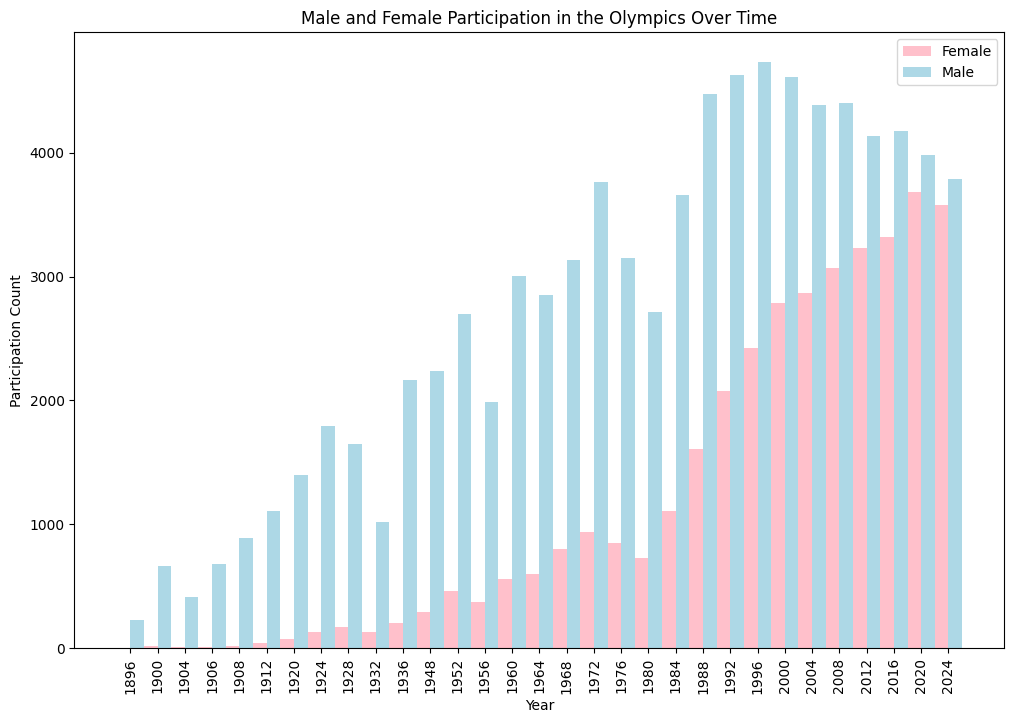

In [191]:
import numpy as np
figure, ax = plt.subplots(figsize=(12, 8))
participation_df = df.groupby(by=['year', 'gender']).size().reset_index(name='participation_count')
participation_pivot = participation_df.pivot(index='year', columns='gender', values='participation_count').fillna(0)
participation_pivot = pd.merge(left=all_years, right=participation_pivot, how='left', on='year').fillna(0)

bar_width = 0.5

r1 = np.arange(len(participation_pivot['year']))  # positions for female bars
r2 = [x + bar_width for x in r1]  # positions for male bars

bars2 = ax.bar(r1, participation_pivot['F'], color='pink', width=bar_width, label='Female')

bars1 = ax.bar(r2, participation_pivot['M'], color='lightblue', width=bar_width, label='Male')

ax.set_xlabel('Year')
ax.set_ylabel('Participation Count')
ax.set_title('Male and Female Participation in the Olympics Over Time')

ax.set_xticks([r + bar_width/2 for r in range(len(participation_pivot['year']))])
ax.set_xticklabels(participation_pivot['year'].astype(str), rotation=90)

ax.legend()

plt.show()

We can observe the **particpation for both genders comparable in the recent years** as compared to the past where female participation is much lesser than male participation 